In [45]:
import os, sys

os.chdir('D:\Downloads\@Books\@TPM\@PDPC\@data_analysis\model_build')
sys.path.append('D:\Downloads\@Books\@TPM\@PDPC\@data_analysis\model_build')
from os import listdir
import pandas as pd
import seaborn as sns
import scipy


# CSSE COVID-19 National Daily-reported Cases script
This Jupyter script extracts the national daily-reported COVID-19 cases for specifically 1) South Africa, and 2) a time period of 2021-10-15 till 2022-06-30. Note that one of the data corrections is reversed due to unclear documentation.

# Source for CSSE
The data is scraped from the updates of the SA's Covid-19 online resource & news portal
[Dashboard of daily updates](https://sacoronavirus.co.za/covid-19-daily-cases/page/8/)
[Daily updates in cases](https://sacoronavirus.co.za/category/daily-cases/page/2/)
The numbers between CSSE and SA's source match.
Uncertain how 'new daily cases' is defined,

# alternative data change for new inclusion of infectious period

In [37]:
file_confirmed = '../data_csse/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed_big_df = pd.read_csv(file_confirmed, sep=',')  # read CSV file, separating into columns via commas
# one-line process: get SA, drop non-useful columns, set country as name, and then convert from Dataframe to series
confirmed_sa = confirmed_big_df[confirmed_big_df['Country/Region'] == "South Africa"].drop(columns=['Province/State', 'Lat', 'Long'])\
    .set_index('Country/Region').squeeze()
confirmed_sa = confirmed_sa.rename(index=dict(zip(confirmed_sa.index, pd.to_datetime(confirmed_sa.index)))) # rename date index from appalling US format to international
daily_sa = confirmed_sa.diff(periods=1)  #.dropna().astype(int) # convert from cumulative to daily cases

In [38]:
# get the time period of interest
start_count = '2021-10-15'
end_count = '2022-06-30'
daily_sa_interest = daily_sa.loc[start_count: end_count]


In [0]:
# Make reversion of the errata
daily_sa_interest.loc['2021-11-23'] = 868 # apply correction
save_to_dir = "data_input"
save_to_name = f"data_CSSE_{start_count}_{end_count}.pickletable"
daily_sa_interest.to_pickle(f"{save_to_dir}/{save_to_name}")

<AxesSubplot: ylabel='South Africa'>

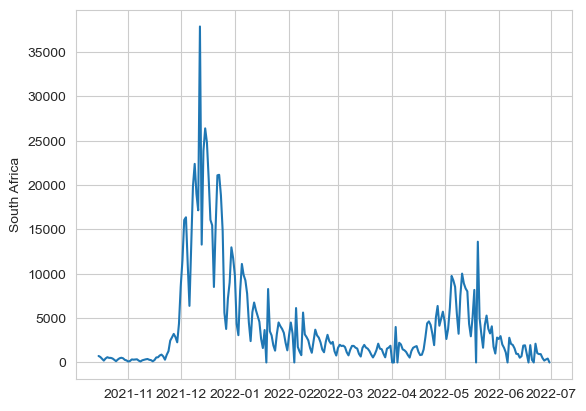

In [46]:
sns.lineplot(daily_sa_interest)

# old code

In [23]:
# get diff

In [4]:
file_dir = '../data_csse/csse_covid_19_data/csse_covid_19_daily_reports'
files_present = [f for f in listdir(file_dir) if '2021' in f]

In [3]:
# we know that the file system is in mm-dd-yyyy format (terrible convention)
dates = pd.date_range(start='2021-10-15',end='2022-01-31')   # perhaps extend the range of importation # already set period of interest
dates_us = dates.strftime('%m-%d-%Y')  # convert to US method for matching
dates_filenames = [f"{n}.csv" for n in dates_us]
# sanity check
match = [f in files_present for f in dates_filenames]
print(f"All files present?: {all(match)}")

All files present?: False


In [4]:
# targeted extraction for SA and for dates of interest
sa_dict = {}
for fname, date in zip(dates_filenames,dates):  # assume correct order
    readfile = pd.read_csv(f'{file_dir}/{fname}')
    sa_dict[date] = readfile[readfile['Country_Region'] == 'South Africa'].squeeze()

del readfile, fname, date

cases_df = pd.DataFrame.from_dict(sa_dict, orient='index')
del sa_dict

# Correction
a manual correction is added to the SA daily case rates
[link, Twitter](https://twitter.com/nicd_sa/status/1463200722615513093)
thus 23 nov 2021 --> 868 (instead of 18586
(tbvh, many annoying things happening getting to here)

In [5]:
# correct day 23 Nov 2021 to be 868
#
parse1 = cases_df['Confirmed'].diff(periods=1)

parse1.loc['2021-11-23'] = 868 # apply correction

In [6]:
parse1 = parse1.dropna().astype(int)

In [7]:
save_to_dir = "../data_input"
save_to_name = "data_CSSE.pickletable"
parse1.to_pickle(f"{save_to_dir}/{save_to_name}")

In [8]:
# readfile = pd.read_csv(f'{file_dir}/{file_name}')
# # truncate for SA already
# readfile = readfile[readfile['Country/Region'] == 'South Africa'].drop(['Province/State','Country/Region','Lat','Long'], axis=1).T.squeeze().rename('cases')
# readfile.index = pd.to_datetime(readfile.index)